In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [8]:
df = pd.read_csv(r"C:\Users\acer\Documents\IT24100930\personality_dataset.csv")
df.head()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,3,Yes,6,7,No,14,5,Extrovert
1,2,No,8,6,No,7,8,Extrovert
2,1,No,9,4,No,9,3,Extrovert
3,8,No,0,0,Yes,9,3,Introvert
4,5,Yes,3,0,No,2,6,Introvert


In [11]:
numeric_features = ['Time_spent_Alone','Social_event_attendance',
                    'Going_outside','Friends_circle_size','Post_frequency']

X = df[numeric_features]
X.head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
0,3,6,7,14,5
1,2,8,6,7,8
2,1,9,4,9,3
3,8,0,0,9,3
4,5,3,0,2,6


In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

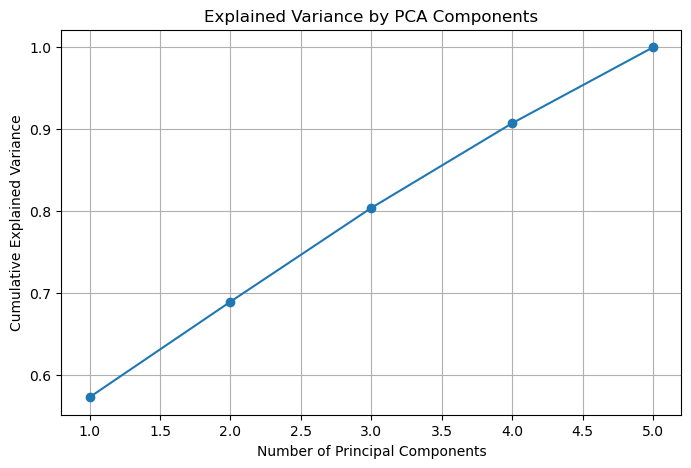

In [16]:
plt.figure(figsize=(8,5))
plt.plot(range(1, len(numeric_features)+1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

In [18]:
pca_opt = PCA(n_components=2)
X_pca_opt = pca_opt.fit_transform(X_scaled)

In [19]:
print("Explained Variance (2 PCs):", pca_opt.explained_variance_ratio_)

Explained Variance (2 PCs): [0.57270826 0.11666693]


In [20]:
print("Total Variance Retained:", np.sum(pca_opt.explained_variance_ratio_))

Total Variance Retained: 0.6893751911578059


In [21]:
pca_df = pd.DataFrame(X_pca_opt, columns=['PC1','PC2'])

In [22]:
pca_df['Personality'] = df['Personality']

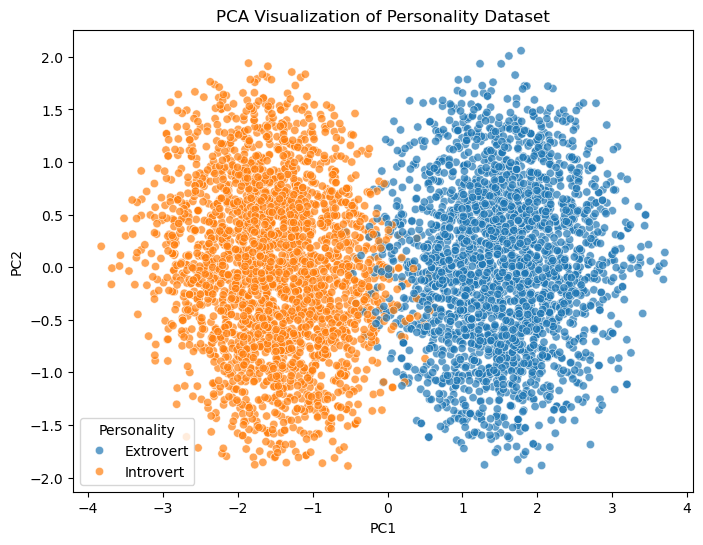

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Personality', alpha=0.7)
plt.title("PCA Visualization of Personality Dataset")
plt.show()

In [25]:
loadings = pd.DataFrame(pca_opt.components_.T, 
                        columns=['PC1','PC2'], 
                        index=numeric_features)
print(loadings)

                              PC1       PC2
Time_spent_Alone        -0.434289  0.628251
Social_event_attendance  0.465906  0.142342
Going_outside            0.464341  0.050863
Friends_circle_size      0.437730  0.705495
Post_frequency           0.432556 -0.291084


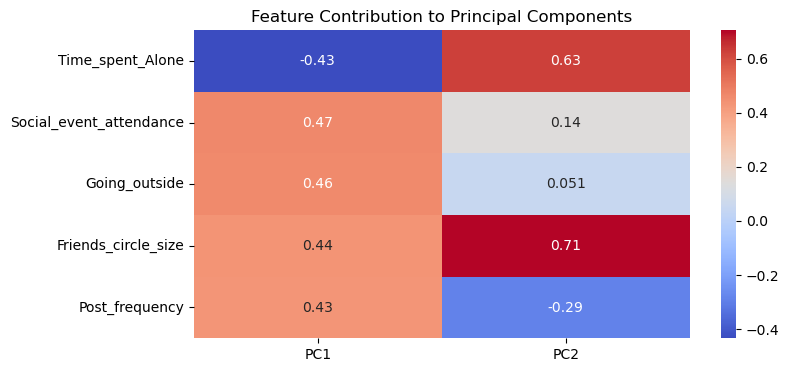

In [26]:
plt.figure(figsize=(8,4))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title("Feature Contribution to Principal Components")
plt.show()

In [27]:
pca_df.to_csv("pca_transformed_dataset.csv", index=False)